In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd 'drive/My Drive/Finding Chandler'

/content/drive/My Drive/Finding Chandler


In [0]:
import pandas as pd

df1 = pd.read_csv('train.csv')

In [0]:
df1.shape

(39780, 3)

In [0]:
df.head()

,Id,label,text
0,0,0,@Estrada21Karla Happy Happy Birthday Mommy Kar...
1,1,0,"Thank you Sabrina, great talk on timeless conn..."
2,2,0,Really not looking forward to tomorrow. I'm no...
3,3,1,Miley and Liam's relationship in the last song...
4,4,1,"What doesn't kill you makes you stronger. "" Wh..."


In [0]:
df2 = pd.read_csv('test.csv')

In [0]:
df_com = pd.concat([df1, df2], ignore_index=True)
df_com.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Id,label,text
0,0,0.0,@Estrada21Karla Happy Happy Birthday Mommy Kar...
1,1,0.0,"Thank you Sabrina, great talk on timeless conn..."
2,2,0.0,Really not looking forward to tomorrow. I'm no...
3,3,1.0,Miley and Liam's relationship in the last song...
4,4,1.0,"What doesn't kill you makes you stronger. "" Wh..."


In [0]:
df_com.drop(['label'], axis=1,inplace=True)
df_com.head()

,Id,text
0,0,@Estrada21Karla Happy Happy Birthday Mommy Kar...
1,1,"Thank you Sabrina, great talk on timeless conn..."
2,2,Really not looking forward to tomorrow. I'm no...
3,3,Miley and Liam's relationship in the last song...
4,4,"What doesn't kill you makes you stronger. "" Wh..."


In [0]:
df_com.to_csv('data_lang.csv', index=False)

In [0]:
data_lm = TextLMDataBunch.from_csv(Path(''), 'data_lang.csv')
data_lm.save('data_lm1.pkl')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CrossEntropyLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
data_lm = load_data('','data_lm1.pkl', bs=48)

In [0]:
data_lm = (TextList.from_folder('Finding Chandler', extensions={'.csv'})
            .split_by_rand_pct(0.1)
            .label_for_lm()           
            .databunch(bs=48))
data_lm.save('data_lm1.pkl')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CrossEntropyLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
data_lm = load_data('','data_lm.pkl', bs=48)

In [0]:
data_lm.show_batch(10)

idx,text
0,"that you got to speak . xxmaj we got , xxunk to me , do n't speak to me ' so we never knew which . xxmaj same result xxbos xxmaj it 's not so much blowing my diet as preventing the xxunk from developing freezer burn . # sarcasm xxbos xxmaj why would you pay $ 80 for a bra at xxmaj victoria 's xxmaj secret when i will"
1,'s not being talked about # sarcasm xxbos xxmaj this week long hotel stay might not be so bad xxbos xxmaj you know its cold outside when you go outside and its cold # sarcasm xxbos wow i feel loved ... # not # sarcasm xxbos xxmaj the best feeling in the world is when someone you hate tells a joke and nobody laughs # sarcasm xxbos xxmaj who would
2,"❤ ️ # not # sarcasm xxbos xxmaj y'all swear everything is a relationship goal . xxmaj stfu xxbos xxmaj when love and trust are gone i guess this is moving on xxmaj everyone i do right does me wrong xxmaj so every lonely night , i sing this song xxbos xxmaj taste w ur eye , ears , lips & touch 2 know deep satisfaction & understanding . xxmaj"
3,my headphones and just listen all day people talking around maybe one day i will just wake up and speak german # yeahright # sarcasm xxbos xxunk xxmaj really hoping it 's on youtube soon because it 's xxunk here ( # xxmaj rebel ) and i have school in the morning so i could nt watch it xxbos xxmaj we had an amazing day in xxmaj xxunk on the
4,"xxmaj mr. t xxmaj xxunk ! xxbos xxmaj we all want our parents to be proud of our accomplishments xxbos xxunk papa johns pizza is the best tho lmao i love it xxbos xxmaj every year , i realize how stupid i was the year before . # sarcasm xxbos xxmaj life is like a bowel movement , it 's still gon na happen whether your sh*t 's together or"
5,or book bc i also have a physics exam yay for xxunk . # sarcasm xxbos xxmaj empire xxmaj state of xxmaj xxunk xxunk xxmaj shout out to for bringing xxbos xxmaj do n't feel good at all ! i love having the feeling i 'm going to throw up very 5 minutes . # not xxbos xxup xxunk and rain does n't make good weather for work or cycling
6,"nice and i love talking to people . xxmaj but lately i rather be left alone . # sarcasm xxbos i am so heartbroken , shattered and xxunk xxup beyond xxup words ... i lost my grandma last night ... xxmaj it hurts xxbos xxmaj so , go away 4 a week & come back 2 find xxmaj xxunk has gone to spuds , xxup xxunk on way to xxmaj"
7,happy because i 'm not searching for xxunk in other people anymore . i 'm happy because i am getting better everyday . xxbos xxmaj no more foolin around . xxmaj time to get serious xxbos xxmaj just heard a conversation going on at xxmaj xxunk -mart about a girl who is getting married to a hobo ... # xxmaj umm # hownice ? xxbos xxmaj that awkward moment when
8,"to veterans xxmaj mrs. xxmaj clinton ? i 'm not trying to be xxunk , you know as well as i do we do not trust you . xxbos xxmaj and we as in xxup xxunk and i have most of you females mad 😭 😂 ☺ ️ that 's okay tho . birds need love too . # xxup not # sarcasm xxbos and there are too - bright"
9,"is how removing tattoos with xxunk works xxbos xxmaj this bitch really took her time to write a letter cuz of xxmaj cam xxmaj newtown 's dab dance . # whitepeopleproblems xxbos xxmaj the xxmaj whisper xxmaj challenge with the bae back in the day # youtube # game # challengeaccepted # xxunk xxbos i need to write something on paper , remember it xxbos xxunk xxunk xxmaj who the"


In [0]:
config = awd_lstm_lm_config.copy()
config['qrnn'] = True

In [0]:
gc.collect()
torch.cuda.empty_cache()

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.65)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


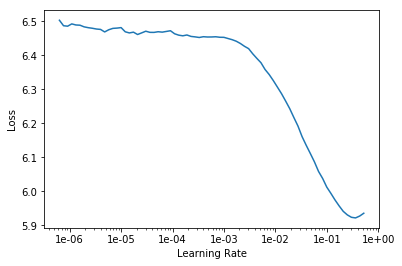

In [0]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.496573,4.170835,0.259859,01:20


In [0]:
learn.save('fit_head2')

In [0]:
learn.load('fit_head2')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (33403 items)
x: LMTextList
xxbos xxunk i know this kid is like kinda ugly but he 's still cute,xxbos xxmaj yay for xxunk being out of school next week ☺ ️ # sarcasm,xxbos xxmaj yay , xxmaj friday tomorrow ! 😄 xxmaj how i love my day off to chill , appreciate nice things & generally embrace all that is good about life 😄 ❤,xxbos i 'm impressed in a way that you got to speak . xxmaj we got , xxunk to me , do n't speak to me ' so we never knew which . xxmaj same result,xxbos xxmaj it 's not so much blowing my diet as preventing the xxunk from developing freezer burn . # sarcasm
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (8352 items)
x: LMTextList
xxbos xxunk _ xxmaj awesome and sounds good ! xxmaj have fun doing your homework ! tweet me when you 're finished ! :) # sarcasm,xxbos i just took a shower and only shaved one leg .. xxmaj what is wrong with me lol # sarcasm,xxbos xxmaj my momma tryna get me a car for xxmaj christmas .. 

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(6, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.133701,4.012432,0.279565,01:37
1,4.002191,3.924612,0.288983,01:37
2,3.825993,3.860623,0.298687,01:37
3,3.630345,3.839178,0.302530,01:37
4,3.468774,3.834478,0.304496,01:37
5,3.365428,3.843884,0.303938,01:37


In [0]:
learn.save('fine_tuned3')

In [0]:
learn.load('fine_tuned3');

In [0]:
TEXT = "I enjoy"
N_WORDS = 40
N_SENTENCES = 3

In [0]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I enjoy listening to Danny Bliss on the radio . It 's a great feeling here . # not # sarcasm xxbos Cleaning your house and cleaning my room 's room is like fucking great # sarcasm xxbos
I enjoy the smell of freshly washed clothes xxbos Dear Computer Lab , Doctors Lab , Lab Lab , Science Lab Physics , Physics Test , Physics ,
I enjoy looking at my books for like 3 years . i 'm not about to be able to write on a paper . # sarcasm xxbos RT The Parents are So Happy We Are


In [0]:
learn.save_encoder('fine_tuned_enc3')

In [0]:
df = pd.read_csv('train.csv')
df.name = df.replace(to_replace='#sarcasm', value="",regex=True, inplace=True)

In [0]:
df.to_csv('mod_train.csv', index=False)
#df.head()

In [0]:
data_clas = TextDataBunch.from_csv('', 'mod_train.csv', text_cols=2, label_cols=1, vocab=data_lm.vocab)
data_clas.save('data_clas1.pkl')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CrossEntropyLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
data_clas = load_data('','data_clas1.pkl')

In [0]:
len(data_clas.train_ds)

31823

In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.7)
learn.load_encoder('fine_tuned_enc2')
#learn.clip_grad(0.3)

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.load('fifth3_final_93%')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.export('final_model')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CrossEntropyLoss. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type SequentialRNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type MultiBatchEncoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type AWD_LSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/u

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


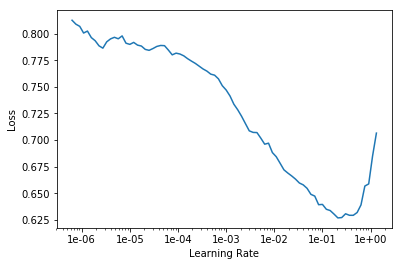

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.485765,0.399010,0.822043,00:31


In [0]:
learn.save('first2')

In [0]:
learn.load('first2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.463372,0.389290,0.824934,00:36


In [0]:
learn.predict("Can't wait to see more of your breast feeding selfies.")

(Category 1, tensor(1), tensor([0.1752, 0.8248]))

In [0]:
learn.save('second3')
learn.load('second3')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.428216,0.373283,0.831595,01:04


In [0]:
learn.save('third2')
learn.load('third2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.395034,0.362349,0.838758,01:20
1,0.378276,0.344203,0.850698,01:17
2,0.338452,0.337784,0.856102,01:24
3,0.314576,0.339654,0.859118,01:26


In [0]:
learn.save('final5')
learn.load('final5')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.328530,0.335988,0.857484,01:22
1,0.279775,0.335740,0.860249,01:24


In [0]:
#learn.save('clip5')
learn.load('clip5')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.285963,0.301495,0.876838,01:21
1,0.249727,0.305111,0.877718,01:23


In [0]:
learn.save('sixth5')
learn.load('sixth5')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.337157,0.307922,0.869046,01:20
1,0.324606,0.303706,0.872439,01:15


In [0]:
learn.save('ninth5')
learn.load('ninth5')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos overly general classification of people is not right . i am not the same xxup xxunk,xxbos xxup xxunk 😂 😂 😂 when the xxmaj black girl w glasses said she ca n't take care of them cus she was drinking xxmaj whiskey . xxmaj lol,xxbos xxmaj the xxmaj tiger xxunk is something special,xxbos xxmaj really excited for the xxmaj gathering tonight ! xxmaj the chapel band is singing and recording their whole album . xxmaj go if you love worship !,xxbos xxmaj sat in bed xxunk on xxmaj pick n xxmaj mix - you would n't think i was going to xxmaj mexico in 4 weeks time ! # xxunk # not # xxunk xxunk
y: CategoryList
0,0,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj are you high enough without the xxmaj mary xxmaj jane like me ? xxmaj saying that you should n't waste your pretty face like me .,xxbos xxmaj cut your hair they say , it will grow back xxunk and faster they say # not 😒,xxbos a webmd tha

In [0]:
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.310227,0.308807,0.874576,01:13
1,0.286405,0.304649,0.873445,01:18


In [0]:
test_df = pd.read_csv('test.csv')

In [0]:
learn.export()

In [0]:
test_df.head()

,Id,text
0,0,Gotta stay up and watch the game tonight to ma...
1,1,I can speak to you so honestly I can't even ru...
2,2,He says he is so grateful that he can speak so...
3,3,i'm going there next Tuesday to speak to them ...
4,4,I seriously live being ignored . #not


In [0]:
import numpy as np
label = np.zeros((1975, 1))

In [0]:
test_df['text']

0       Gotta stay up and watch the game tonight to ma...
1       I can speak to you so honestly I can't even ru...
2       He says he is so grateful that he can speak so...
3       i'm going there next Tuesday to speak to them ...
4                   I seriously live being ignored . #not
5       everyone in my class is ill including me so de...
6       Actions speak louder than words . But every gi...
7       how difficult is to sing opera-in another lang...
8       I LOVE when some of my texts get ignored . It'...
9       Funny coffee mugs that speak the truth so you ...
10      thanks for making me feel soo much better #ann...
11      I love walking from Wilson all the way to dodg...
12      I just love how teachers have this magical con...
13      If given the opportunity to speak to every you...
14      Another lovely day in the job site #Sarcastict...
15                            I like working 815-7 . #not
16      Being half spanish and not being able to speak...
17      I feel

In [0]:
for i in range(1975):
  cl,l,p = learn.predict(test_df['text'][i])
  label[i] = int(l)

In [0]:
cl,l,p = learn.predict("Can't wait to see more of your breast feeding selfies.")

In [0]:
int(l)

1

In [0]:
np.savetxt("submission13.csv", label)

In [0]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

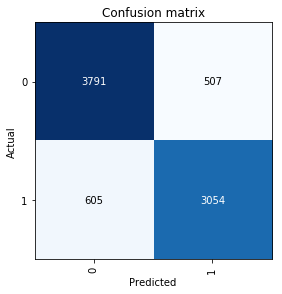

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused()

[(0, 1, 526), (1, 0, 482)]

In [0]:
y

tensor([1, 0, 1,  ..., 0, 0, 0])

In [0]:
learn.predict(data_clas.valid_ds[10][0])

(Category 1, tensor(1), tensor([0.2406, 0.7594]))

In [0]:
#learn.unfreeze()
learn.fit_one_cycle(8, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.342021,0.256292,0.897072,01:20


In [0]:
#learn.unfreeze()
learn.fit_one_cycle(8, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.313914,0.251476,0.897574,01:24
1,0.301312,0.248801,0.900088,01:24
2,0.291995,0.250607,0.895689,01:25
3,0.251883,0.243462,0.901722,01:24
4,0.224794,0.246024,0.902476,01:25
5,0.195769,0.246239,0.906497,01:18
6,0.174855,0.249306,0.904989,01:23
7,0.182723,0.250878,0.904110,01:21


In [0]:
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.185444,0.255751,0.901847,01:17


In [0]:
learn.load('fourth_final')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos # xxmaj great " xxunk : xxmaj thank you all ! xxmaj xxunk xxmaj xxunk has been found,xxbos xxmaj two classes on the engineering quad ... xxmaj not out of place at all ... # awkward,xxbos xxmaj plus i ca nt even go to the gym to release my frustration because i have no xxunk there . xxmaj home alone , bored and frustrated .,xxbos xxmaj why does my stupid android keyboard keep changing words at the very last minute . xxmaj never again .,xxbos xxmaj such a sad moment when you order clothes online and they do n't look nothing like they did in the picture 😢
y: CategoryList
0,1,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj here 's an allergy xxmaj xxunk ! i love xxmaj how many different things xxmaj xxunk can help !,xxbos xxmaj they should invent wifi bracelets , so you can wear them anywhere and have wifi connection .,xxbos i hate talkin when i wake up , just dnt say shit to me for a

In [0]:
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.374852,0.274146,0.889531,00:33


In [0]:
learn.save('fifth')
learn.load('fifth')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos # xxmaj great " xxunk : xxmaj thank you all ! xxmaj xxunk xxmaj xxunk has been found,xxbos xxmaj two classes on the engineering quad ... xxmaj not out of place at all ... # awkward,xxbos xxmaj plus i ca nt even go to the gym to release my frustration because i have no xxunk there . xxmaj home alone , bored and frustrated .,xxbos xxmaj why does my stupid android keyboard keep changing words at the very last minute . xxmaj never again .,xxbos xxmaj such a sad moment when you order clothes online and they do n't look nothing like they did in the picture 😢
y: CategoryList
0,1,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj here 's an allergy xxmaj xxunk ! i love xxmaj how many different things xxmaj xxunk can help !,xxbos xxmaj they should invent wifi bracelets , so you can wear them anywhere and have wifi connection .,xxbos i hate talkin when i wake up , just dnt say shit to me for a

In [0]:
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.368227,0.277658,0.890662,00:35


In [0]:
learn.save('sixth')
learn.load('sixth')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos # xxmaj great " xxunk : xxmaj thank you all ! xxmaj xxunk xxmaj xxunk has been found,xxbos xxmaj two classes on the engineering quad ... xxmaj not out of place at all ... # awkward,xxbos xxmaj plus i ca nt even go to the gym to release my frustration because i have no xxunk there . xxmaj home alone , bored and frustrated .,xxbos xxmaj why does my stupid android keyboard keep changing words at the very last minute . xxmaj never again .,xxbos xxmaj such a sad moment when you order clothes online and they do n't look nothing like they did in the picture 😢
y: CategoryList
0,1,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj here 's an allergy xxmaj xxunk ! i love xxmaj how many different things xxmaj xxunk can help !,xxbos xxmaj they should invent wifi bracelets , so you can wear them anywhere and have wifi connection .,xxbos i hate talkin when i wake up , just dnt say shit to me for a

In [0]:
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.357653,0.271260,0.889783,00:34


In [0]:
#learn.save('seventh')
learn.load('seventh')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos # xxmaj great " xxunk : xxmaj thank you all ! xxmaj xxunk xxmaj xxunk has been found,xxbos xxmaj two classes on the engineering quad ... xxmaj not out of place at all ... # awkward,xxbos xxmaj plus i ca nt even go to the gym to release my frustration because i have no xxunk there . xxmaj home alone , bored and frustrated .,xxbos xxmaj why does my stupid android keyboard keep changing words at the very last minute . xxmaj never again .,xxbos xxmaj such a sad moment when you order clothes online and they do n't look nothing like they did in the picture 😢
y: CategoryList
0,1,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj here 's an allergy xxmaj xxunk ! i love xxmaj how many different things xxmaj xxunk can help !,xxbos xxmaj they should invent wifi bracelets , so you can wear them anywhere and have wifi connection .,xxbos i hate talkin when i wake up , just dnt say shit to me for a

In [0]:
learn.load('seventh')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (31823 items)
x: TextList
xxbos # xxmaj great " xxunk : xxmaj thank you all ! xxmaj xxunk xxmaj xxunk has been found,xxbos xxmaj two classes on the engineering quad ... xxmaj not out of place at all ... # awkward,xxbos xxmaj plus i ca nt even go to the gym to release my frustration because i have no xxunk there . xxmaj home alone , bored and frustrated .,xxbos xxmaj why does my stupid android keyboard keep changing words at the very last minute . xxmaj never again .,xxbos xxmaj such a sad moment when you order clothes online and they do n't look nothing like they did in the picture 😢
y: CategoryList
0,1,0,0,1
Path: .;

Valid: LabelList (7957 items)
x: TextList
xxbos xxmaj here 's an allergy xxmaj xxunk ! i love xxmaj how many different things xxmaj xxunk can help !,xxbos xxmaj they should invent wifi bracelets , so you can wear them anywhere and have wifi connection .,xxbos i hate talkin when i wake up , just dnt say shit to me for a